In [1]:
from itertools import cycle, islice

from algorithms import * 
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_blobs

In [2]:
# Make blobs data 
X, y = make_blobs(1500, random_state=8)

In [3]:
# Context matrix
context = np.vstack([X.min(axis=0), X.max(axis=0)])

In [4]:
# Create dyclee class object 
dyclee = SerialDyClee(phi=0.06, context=context)

In [5]:
%%time
# Run dyclee
#dyclee.run_dataset(data=X, targetcol=y)
dyclee.run_dataset(data=X)

Wall time: 116 ms


In [6]:
# Show all clusters 
dyclee.A_list, dyclee.O_list

([],
  <clusters.MicroCluster at 0x27175b3fe20>])

In [7]:
# amount of clusters 
len(dyclee.O_list)

2

In [8]:
# combine all clusters 
all_uC = dyclee.A_list + dyclee.O_list

In [9]:
# create dataframe
cluster_df = pd.DataFrame([uC.get_center() for uC in all_uC], columns=['x', 'y'])

<AxesSubplot:xlabel='x', ylabel='y'>

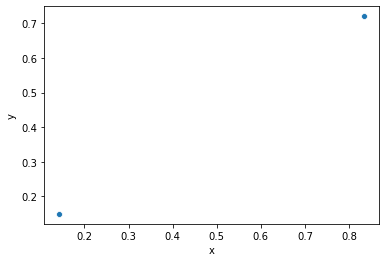

In [10]:
# plot microclusters
sns.scatterplot(x='x',y='y',data=cluster_df)

In [11]:
dyclee._get_hyperbox_sizes()

array([1.10715077, 1.55172134])